## **Introduction**

As the UEFA EURO 2024 is ongoing, the integration of advanced analytics in sports has becoming increasingly significant. Comprehensive datasets covering various aspects of football have opened new possibilities for teams to prepare, strategize, and compete. In recent years, data science and machine learning have revolutionized sports analytics, offering profound insights into player performance, tactical decisions, and overall team effectiveness. Beyond the realm of sports, EURO 2024 also plays a crucial role in the tourism industry of the host nations, making it an area of significant interest for economic analysis.

However, despite the abundance of data, several challenges hinder its effective utilization in football analytics. Data fragmentation and accessibility issues arise from the dispersion of information across various platforms without a standardized format for analysis. The complexity of the data, which includes both structured data, like player statistics, and unstructured data, such as tactical formations and real-time game developments, adds another layer of difficulty. Additionally, current analyses often fail to fully leverage advanced machine learning techniques that could provide deeper insights into complex dynamics like in-game decision-making and player performance under varying conditions.

Our goal in this notebook is to quantify teams' play styles using data and machine learning. By utilizing historical match scores and clustering teams, we aim to identify distinct playing styles and validate these clusters with new data. This approach helps in understanding the effectiveness of different strategies and provides actionable insights for future tournaments.

Our data sources for this notebook are fbref.com and whoscored.com, two well-regarded platforms in the field of football statistics and analytics. FBref.com provides comprehensive data on player and team performances, offering a wealth of historical and current statistics. Whoscored.com is known for its detailed match analysis, including player ratings, tactical formations, and game developments. Both sources are legitimate and widely recognized for their accuracy and depth of data, making them ideal for our analysis. It is important to note that since the UEFA Euro 2024 tournament is still ongoing, all 2024 datasets provide information only through the group stages and not the qualifying stages.

### **Data Dictionaries:**

#### **FBref.com:**

* **Squad:** Team name
* **Pl:** Number of players in the squad
* **Age:** Average age of players in the squad
* **Poss:** Average possession percentage
* **MP:** Matches played
* **Starts:** Matches started by players in the squad
* **Min:** Total minutes played by players in the squad
* **90s:** Number of full 90-minute matches equivalent played by players in the squad
* **Gls:** Goals scored by the team
* **Ast:** Assists made by the team
* **G+A:** Goals plus assists by the team
* **G-PK:** Goals minus penalties by the team
* **PK:** Penalty goals scored by the team
* **PKatt:** Penalty attempts by the team
* **CrdY:** Yellow cards received by the team
* **CrdR:** Red cards received by the team
* **xG:** Expected goals
* **npxG:** Non-penalty expected goals
* **xAG:** Expected assists
* **npxG+xAG:** Non-penalty expected goals plus expected assists
* **PrgC:** Progressive carries by the team
* **PrgP:** Progressive passes by the team
* **Gls.1:** Goals per 90 minutes
* **Ast.1:** Assists per 90 minutes
* **G+A.1:** Goals plus assists per 90 minutes
* **G-PK.1:** Goals minus penalties per 90 minutes
* **G+A-PK:** Goals plus assists minus penalties per 90 minutes
* **xG.1:** Expected goals per 90 minutes
* **xAG.1:** Expected assists per 90 minutes
* **xG+xAG:** Expected goals plus expected assists per 90 minutes
* **npxG.1:** Non-penalty expected goals per 90 minutes
* **npxG+xAG.1:** Non-penalty expected goals plus expected assists per 90 minutes

#### **WhoScored.com:**

* **Squad:** Team name
* **Goals:** Goals scored by the team
* **Shots pg:** Average shots per game by the team
* **Possession%:** Average possession percentage by the team
* **Pass%:** Passing accuracy percentage by the team
* **AerialsWon:** Average aerial duels won per game by the team
* **Rating:** Overall team rating

**Machine Learning Model- K-Means Clustering Algorithm**

For our machine learning model, we have chosen the K-means clustering algorithm. K-means is particularly suitable for our analysis because it effectively groups teams based on their playing styles and performance metrics. By identifying clusters of teams with similar characteristics, we can analyze and compare different strategies and their effectiveness. This approach allows us to gain deeper insights into team dynamics and performance trends over the years, providing a comprehensive understanding of what makes teams successful in the UEFA EURO tournaments.

In summary, this notebook leverages advanced machine learning techniques to analyze and quantify teams' playing styles using historical data. By clustering teams and validating these clusters with new data, we can identify key patterns and strategies that contribute to success in the tournaments. This analysis not only enhances our understanding of football dynamics, but also offers actionable insights for teams aiming to improve their performance in future UEFA EURO events.

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load in the fbref_2012 dataset
fbref_2012= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2012_fbref_team_stats.csv')

# View the dataset
fbref_2012.head()

,Squad,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
0,Croatia,16,26.9,3,33,270,3.0,4,3,7,4,0,0,9,0,1.33,1.00,2.33,1.33,2.33
1,Czechia,19,27.8,4,44,360,4.0,4,4,8,4,0,0,7,0,1.00,1.00,2.00,1.00,2.00
2,Denmark,15,27.1,3,33,270,3.0,4,3,7,4,0,0,4,0,1.33,1.00,2.33,1.33,2.33
3,England,16,27.6,4,44,390,4.3,5,4,9,5,0,0,5,0,1.15,0.92,2.08,1.15,2.08
4,France,19,26.8,4,44,360,4.0,3,3,6,3,0,0,6,0,0.75,0.75,1.50,0.75,1.50


In [ ]:
# View the shape and the data types
print(fbref_2012.shape)
print(fbref_2012.dtypes)

(16, 20)
Squad      object
# Pl        int64
Age       float64
MP          int64
Starts      int64
Min         int64
90s       float64
Gls         int64
Ast         int64
G+A         int64
G-PK        int64
PK          int64
PKatt       int64
CrdY        int64
CrdR        int64
Gls.1     float64
Ast.1     float64
G+A.1     float64
G-PK.1    float64
G+A-PK    float64
dtype: object


In [ ]:
# Load in the fbref_2016 dataset
fbref_2016= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2016_fbref_team_stats.csv')

# View the dataset
fbref_2016.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK
0,Albania,20,27.2,40.3,3,33,270,3.0,1,1,...,1,0,0,10,1,0.33,0.33,0.67,0.33,0.67
1,Austria,19,27.2,54.0,3,33,270,3.0,1,1,...,1,0,1,7,1,0.33,0.33,0.67,0.33,0.67
2,Belgium,20,25.9,52.4,5,55,450,5.0,9,8,...,9,0,0,9,0,1.80,1.60,3.40,1.80,3.40
3,Croatia,20,28.1,48.8,4,44,390,4.3,5,4,...,5,0,0,8,0,1.15,0.92,2.08,1.15,2.08
4,Czechia,19,29.5,42.3,3,33,270,3.0,2,1,...,1,1,1,5,0,0.67,0.33,1.00,0.33,0.67


In [ ]:
# View the shape and the data types
print(fbref_2016.shape)
print(fbref_2016.dtypes)

(24, 21)
Squad      object
# Pl        int64
Age       float64
Poss      float64
MP          int64
Starts      int64
Min         int64
90s       float64
Gls         int64
Ast         int64
G+A         int64
G-PK        int64
PK          int64
PKatt       int64
CrdY        int64
CrdR        int64
Gls.1     float64
Ast.1     float64
G+A.1     float64
G-PK.1    float64
G+A-PK    float64
dtype: object


In [ ]:
# Load in the fbref_2020 dataset
fbref_2020= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2020_fbref_team_stats.csv')

# View the dataset
fbref_2020.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Austria,22,27.1,53.5,4,44,390,4.3,5,5,...,1.15,1.15,2.31,1.15,2.31,1.17,0.98,2.14,1.17,2.14
1,Belgium,24,29.2,53.8,5,55,450,5.0,8,6,...,1.60,1.20,2.80,1.40,2.60,1.18,0.81,2.00,1.03,1.84
2,Croatia,21,27.7,50.0,4,44,390,4.3,6,5,...,1.38,1.15,2.54,1.38,2.54,1.27,1.17,2.45,1.27,2.45
3,Czechia,21,28.0,48.2,5,55,450,5.0,6,4,...,1.20,0.80,2.00,1.00,1.80,1.23,0.94,2.17,1.07,2.01
4,Denmark,21,27.7,53.3,6,66,570,6.3,12,8,...,1.89,1.26,3.16,1.89,3.16,1.57,1.01,2.58,1.45,2.46


In [ ]:
# View the shape and the data types
print(fbref_2020.shape)
print(fbref_2020.dtypes)

(24, 32)
Squad          object
# Pl            int64
Age           float64
Poss          float64
MP              int64
Starts          int64
Min             int64
90s           float64
Gls             int64
Ast             int64
G+A             int64
G-PK            int64
PK              int64
PKatt           int64
CrdY            int64
CrdR            int64
xG            float64
npxG          float64
xAG           float64
npxG+xAG      float64
PrgC            int64
PrgP            int64
Gls.1         float64
Ast.1         float64
G+A.1         float64
G-PK.1        float64
G+A-PK        float64
xG.1          float64
xAG.1         float64
xG+xAG        float64
npxG.1        float64
npxG+xAG.1    float64
dtype: object


In [ ]:
# Load in the fbref_2024 dataset
fbref_2024= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2024_fbref_team_stats.csv')

# View the dataset
fbref_2024.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Albania,19,27.4,35.7,3,33,270,3,3,1,...,1.00,0.33,1.33,1.00,1.33,0.81,0.53,1.34,0.81,1.34
1,Austria,19,27.4,50.3,3,33,270,3,5,4,...,1.67,1.33,3.00,1.33,2.67,1.27,0.78,2.05,1.01,1.78
2,Belgium,17,28.1,58.3,3,33,270,3,2,1,...,0.67,0.33,1.00,0.67,1.00,1.42,1.00,2.43,1.42,2.43
3,Croatia,19,29.0,55.7,3,33,270,3,2,1,...,0.67,0.33,1.00,0.67,1.00,1.89,1.17,3.07,1.35,2.52
4,Czechia,21,27.2,40.7,3,33,270,3,3,2,...,1.00,0.67,1.67,1.00,1.67,1.66,1.04,2.70,1.66,2.70


In [ ]:
# View the shape and the data types
print(fbref_2024.shape)
print(fbref_2024.dtypes)

(24, 32)
Squad          object
# Pl            int64
Age           float64
Poss          float64
MP              int64
Starts          int64
Min             int64
90s             int64
Gls             int64
Ast             int64
G+A             int64
G-PK            int64
PK              int64
PKatt           int64
CrdY            int64
CrdR            int64
xG            float64
npxG          float64
xAG           float64
npxG+xAG      float64
PrgC            int64
PrgP            int64
Gls.1         float64
Ast.1         float64
G+A.1         float64
G-PK.1        float64
G+A-PK        float64
xG.1          float64
xAG.1         float64
xG+xAG        float64
npxG.1        float64
npxG+xAG.1    float64
dtype: object


In [ ]:
# Load in the whoscored_2012 dataset
whoscored_2012= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2012_whoscored_team_stats.csv')

# View the dataset
whoscored_2012.head()

,Squad,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Spain,12,16.7,65.8,88.0,8.2,7.24
1,Russia,5,19.7,59.6,83.9,6.7,6.93
2,England,5,10.0,39.3,79.4,7.5,6.93
3,Germany,10,16.0,59.2,87.4,7.4,6.86
4,Italy,6,18.3,52.3,83.8,5.3,6.83


In [ ]:
# View the shape and the data types
print(whoscored_2012.shape)
print(whoscored_2012.dtypes)

(16, 7)
Squad           object
Goals            int64
Shots pg       float64
Possession%    float64
Pass%          float64
AerialsWon     float64
Rating         float64
dtype: object


In [ ]:
# Load in the whoscored_2016 dataset
whoscored_2016= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2016_whoscored_team_stats.csv')

# View the dataset
whoscored_2016.head()

,Squad,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,France,13,17.7,55.2,85.4,21.1,7.11
1,Germany,7,18.8,67.4,87.7,15.2,7.04
2,Belgium,9,19.0,52.5,83.9,14.8,7.03
3,Poland,4,13.8,45.1,78.7,20.0,6.96
4,Croatia,5,16.5,49.4,79.0,22.5,6.94


In [ ]:
# View the shape and the data types
print(whoscored_2016.shape)
print(whoscored_2016.dtypes)

(24, 7)
Squad           object
Goals            int64
Shots pg       float64
Possession%    float64
Pass%          float64
AerialsWon     float64
Rating         float64
dtype: object


In [ ]:
# Load in the whoscored_2020 dataset
whoscored_2020= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2020_whoscored_team_stats.csv')

# View the dataset
whoscored_2020.head()

,Squad,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Belgium,9,9.6,52.9,86.7,15.6,6.85
1,Italy,13,18.1,45.8,86.7,13.1,6.84
2,England,11,9.0,14.7,85.5,17.6,6.84
3,Spain,13,19.2,67.2,89.6,13.3,6.78
4,Denmark,12,15.3,52.0,82.4,21.5,6.78


In [ ]:
# View the shape and the data types
print(whoscored_2020.shape)
print(whoscored_2020.dtypes)

(24, 7)
Squad           object
Goals            int64
Shots pg       float64
Possession%    float64
Pass%          float64
AerialsWon     float64
Rating         float64
dtype: object


In [ ]:
# Load in the whoscored_2024 dataset
whoscored_2024= pd.read_csv('/content/drive/My Drive/Uefa Euro Datasets/2024_whoscored_team_stats.csv')

# View the dataset
whoscored_2024.head()

,Squad,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Spain,5,15.7,54.4,88.5,14.3,6.97
1,Germany,8,19.0,69.4,92.4,9.3,6.89
2,France,2,16.0,56.4,89.1,11.0,6.73
3,Georgia,4,8.7,36.4,81.4,10.3,6.66
4,Belgium,2,16.0,58.6,85.8,11.3,6.65


In [ ]:
# View the shape and the data types
print(whoscored_2024.shape)
print(whoscored_2024.dtypes)

(24, 7)
Squad           object
Goals            int64
Shots pg       float64
Possession%    float64
Pass%          float64
AerialsWon     float64
Rating         float64
dtype: object


In [ ]:
# Standardize team names for the 2012 datasets
fbref_2012['Squad'] = fbref_2012['Squad'].replace({'Rep. of Ireland': 'Ireland'})

# Verify the changes
print(fbref_2012['Squad'].unique())

['Croatia' 'Czechia' 'Denmark' 'England' 'France' 'Germany' 'Greece'
 'Italy' 'Netherlands' 'Poland' 'Portugal' 'Ireland' 'Russia' 'Spain'
 'Sweden' 'Ukraine']


In [ ]:
# Merge fbref_2012 with whoscored_2012 on the 'Squad' column
merged_2012 = pd.merge(fbref_2012, whoscored_2012, on='Squad', how='inner')

# Verify the merged dataset
merged_2012.head()

,Squad,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Croatia,16,26.9,3,33,270,3.0,4,3,7,...,1.00,2.33,1.33,2.33,4,10.7,43.1,76.0,8.7,6.78
1,Czechia,19,27.8,4,44,360,4.0,4,4,8,...,1.00,2.00,1.00,2.00,4,9.8,48.0,77.4,7.8,6.55
2,Denmark,15,27.1,3,33,270,3.0,4,3,7,...,1.00,2.33,1.33,2.33,4,9.0,47.5,82.7,5.0,6.75
3,England,16,27.6,4,44,390,4.3,5,4,9,...,0.92,2.08,1.15,2.08,5,10.0,39.3,79.4,7.5,6.93
4,France,19,26.8,4,44,360,4.0,3,3,6,...,0.75,1.50,0.75,1.50,3,16.3,53.2,87.1,6.0,6.68


In [ ]:
# List unique team names in fbref_2016 and whoscored_2016 datasets
fbref_2016_teams = fbref_2016['Squad'].unique()
whoscored_2016_teams = whoscored_2016['Squad'].unique()

print("Teams in fbref_2016:", fbref_2016_teams)
print("Teams in whoscored_2016:", whoscored_2016_teams)

Teams in fbref_2016: ['Albania' 'Austria' 'Belgium' 'Croatia' 'Czechia' 'England' 'France'
 'Germany' 'Hungary' 'Iceland' 'Italy' 'Northern Ireland' 'Poland'
 'Portugal' 'Ireland' 'Romania' 'Russia' 'Slovakia' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'Ukraine' 'Wales']
Teams in whoscored_2016: ['France' 'Germany' 'Belgium' 'Poland' 'Croatia' 'Wales' 'Portugal'
 'Switzerland' 'England' 'Italy' 'Spain' 'Slovakia' 'Iceland' 'Hungary'
 'Northern Ireland' 'Austria' 'Romania' 'Albania' 'Turkey' 'Ireland'
 'Czechia' 'Sweden' 'Ukraine' 'Russia']


In [ ]:
# Merge fbref_2016 with whoscored_2016 on the 'Squad' column
merged_2016 = pd.merge(fbref_2016, whoscored_2016, on='Squad', how='inner')

# Verify the merged dataset
merged_2016.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Ast.1,G+A.1,G-PK.1,G+A-PK,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Albania,20,27.2,40.3,3,33,270,3.0,1,1,...,0.33,0.67,0.33,0.67,1,9.7,40.6,77.1,14.7,6.56
1,Austria,19,27.2,54.0,3,33,270,3.0,1,1,...,0.33,0.67,0.33,0.67,1,13.7,54.2,78.7,19.7,6.59
2,Belgium,20,25.9,52.4,5,55,450,5.0,9,8,...,1.60,3.40,1.80,3.40,9,19.0,52.5,83.9,14.8,7.03
3,Croatia,20,28.1,48.8,4,44,390,4.3,5,4,...,0.92,2.08,1.15,2.08,5,16.5,49.4,79.0,22.5,6.94
4,Czechia,19,29.5,42.3,3,33,270,3.0,2,1,...,0.33,1.00,0.33,0.67,2,8.7,42.4,71.5,18.3,6.49


In [ ]:
# Check squads in fbref_2020
print("Teams in fbref_2020:", fbref_2020['Squad'].unique())

# Check squads in whoscored_2020
print("Teams in whoscored_2020:", whoscored_2020['Squad'].unique())

Teams in fbref_2020: ['Austria' 'Belgium' 'Croatia' 'Czechia' 'Denmark' 'England' 'Finland'
 'France' 'Germany' 'Hungary' 'Italy' 'North Macedonia' 'Netherlands'
 'Poland' 'Portugal' 'Russia' 'Scotland' 'Slovakia' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'Ukraine' 'Wales']
Teams in whoscored_2020: ['Belgium' 'Italy' 'England' 'Spain' 'Denmark' 'Netherlands' 'France'
 'Switzerland' 'Austria' 'Czechia' 'Sweden' 'Finland' 'Portugal' 'Poland'
 'Wales' 'Croatia' 'Ukraine' 'Germany' 'Scotland' 'Russia' 'Hungary'
 'Turkey' 'North Macedonia' 'Slovakia']


In [ ]:
# Merge fbref_2020 and whoscored_2020 on the 'Squad' column
merged_2020 = fbref_2020.merge(whoscored_2020, on='Squad')

# Verify the merged dataset
merged_2020.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Austria,22,27.1,53.5,4,44,390,4.3,5,5,...,0.98,2.14,1.17,2.14,5,13.3,51.8,81.6,15.0,6.63
1,Belgium,24,29.2,53.8,5,55,450,5.0,8,6,...,0.81,2.00,1.03,1.84,9,9.6,52.9,86.7,15.6,6.85
2,Croatia,21,27.7,50.0,4,44,390,4.3,6,5,...,1.17,2.45,1.27,2.45,7,10.5,49.8,84.5,13.0,6.49
3,Czechia,21,28.0,48.2,5,55,450,5.0,6,4,...,0.94,2.17,1.07,2.01,6,11.2,48.4,76.4,18.8,6.63
4,Denmark,21,27.7,53.3,6,66,570,6.3,12,8,...,1.01,2.58,1.45,2.46,12,15.3,52.0,82.4,21.5,6.78


In [ ]:
# Check the squads in both datasets
fbref_2024_squads = fbref_2024['Squad'].unique()
whoscored_2024_squads = whoscored_2024['Squad'].unique()

print("Teams in fbref_2024:", fbref_2024_squads)
print("Teams in whoscored_2024:", whoscored_2024_squads)

Teams in fbref_2024: ['Albania' 'Austria' 'Belgium' 'Croatia' 'Czechia' 'Denmark' 'England'
 'France' 'Georgia' 'Germany' 'Hungary' 'Italy' 'Netherlands' 'Poland'
 'Portugal' 'Romania' 'Scotland' 'Serbia' 'Slovakia' 'Slovenia' 'Spain'
 'Switzerland' 'Turkey' 'Ukraine']
Teams in whoscored_2024: ['Spain' 'Germany' 'France' 'Georgia' 'Belgium' 'Portugal' 'England'
 'Slovenia' 'Netherlands' 'Turkey' 'Austria' 'Romania' 'Switzerland'
 'Slovakia' 'Italy' 'Croatia' 'Denmark' 'Serbia' 'Ukraine' 'Albania'
 'Poland' 'Hungary' 'Czechia' 'Scotland']


In [ ]:
# Merge fbref_2024 and whoscored_2024 datasets
merged_2024 = pd.merge(fbref_2024, whoscored_2024, on='Squad')

# Verify the merged dataset
merged_2024.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating
0,Albania,19,27.4,35.7,3,33,270,3,3,1,...,0.53,1.34,0.81,1.34,3,11.0,35.2,82.6,8.3,6.46
1,Austria,19,27.4,50.3,3,33,270,3,5,4,...,0.78,2.05,1.01,1.78,6,10.0,50.8,82.5,10.3,6.58
2,Belgium,17,28.1,58.3,3,33,270,3,2,1,...,1.00,2.43,1.42,2.43,2,16.0,58.6,85.8,11.3,6.65
3,Croatia,19,29.0,55.7,3,33,270,3,2,1,...,1.17,3.07,1.35,2.52,3,14.7,55.3,89.0,11.0,6.52
4,Czechia,21,27.2,40.7,3,33,270,3,3,2,...,1.04,2.70,1.66,2.70,3,14.7,39.4,77.5,17.7,6.38


In [ ]:
# Add Year column to each merged dataset
merged_2012['Year'] = 2012
merged_2016['Year'] = 2016
merged_2020['Year'] = 2020
merged_2024['Year'] = 2024

# Verify that the Year column has been added correctly
merged_2012.head()

,Squad,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,G+A.1,G-PK.1,G+A-PK,Goals,Shots pg,Possession%,Pass%,AerialsWon,Rating,Year
0,Croatia,16,26.9,3,33,270,3.0,4,3,7,...,2.33,1.33,2.33,4,10.7,43.1,76.0,8.7,6.78,2012
1,Czechia,19,27.8,4,44,360,4.0,4,4,8,...,2.00,1.00,2.00,4,9.8,48.0,77.4,7.8,6.55,2012
2,Denmark,15,27.1,3,33,270,3.0,4,3,7,...,2.33,1.33,2.33,4,9.0,47.5,82.7,5.0,6.75,2012
3,England,16,27.6,4,44,390,4.3,5,4,9,...,2.08,1.15,2.08,5,10.0,39.3,79.4,7.5,6.93,2012
4,France,19,26.8,4,44,360,4.0,3,3,6,...,1.50,0.75,1.50,3,16.3,53.2,87.1,6.0,6.68,2012


In [ ]:
# Define common columns
common_columns = [
    'Squad', 'Goals', 'Shots pg', 'Possession%', 'Pass%', 'AerialsWon', 'Rating', 'Year'
]

# Ensure each dataset has the common columns
def ensure_common_columns(df, common_columns):
    for col in common_columns:
        if col not in df.columns:
            df[col] = pd.NA
    return df

# Select only the common columns and add the Year
merged_2012 = ensure_common_columns(merged_2012, common_columns)
merged_2016 = ensure_common_columns(merged_2016, common_columns)
merged_2020 = ensure_common_columns(merged_2020, common_columns)
merged_2024 = ensure_common_columns(merged_2024, common_columns)

# Fill NaN values with appropriate placeholders
merged_2012.fillna(0, inplace=True)
merged_2016.fillna(0, inplace=True)
merged_2020.fillna(0, inplace=True)
merged_2024.fillna(0, inplace=True)

# Concatenate all datasets into a single DataFrame
all_data = pd.concat([merged_2012, merged_2016, merged_2020, merged_2024], ignore_index= True)

# View the new dataframe
all_data.head()

,Squad,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,npxG,xAG,npxG+xAG,PrgC,PrgP,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Croatia,16,26.9,3,33,270,3.0,4,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Czechia,19,27.8,4,44,360,4.0,4,4,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,15,27.1,3,33,270,3.0,4,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,16,27.6,4,44,390,4.3,5,4,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,19,26.8,4,44,360,4.0,3,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verify the number of rows per year
print(all_data['Year'].value_counts())

# Inspect the first few rows
print(all_data.head())

# Inspect the last few rows
print(all_data.tail())

Year
2016    24
2020    24
2024    24
2012    16
Name: count, dtype: int64
     Squad  # Pl   Age  MP  Starts  Min  90s  Gls  Ast  G+A  ...  npxG  xAG  \
0  Croatia    16  26.9   3      33  270  3.0    4    3    7  ...   NaN  NaN   
1  Czechia    19  27.8   4      44  360  4.0    4    4    8  ...   NaN  NaN   
2  Denmark    15  27.1   3      33  270  3.0    4    3    7  ...   NaN  NaN   
3  England    16  27.6   4      44  390  4.3    5    4    9  ...   NaN  NaN   
4   France    19  26.8   4      44  360  4.0    3    3    6  ...   NaN  NaN   

   npxG+xAG  PrgC  PrgP  xG.1  xAG.1  xG+xAG  npxG.1  npxG+xAG.1  
0       NaN   NaN   NaN   NaN    NaN     NaN     NaN         NaN  
1       NaN   NaN   NaN   NaN    NaN     NaN     NaN         NaN  
2       NaN   NaN   NaN   NaN    NaN     NaN     NaN         NaN  
3       NaN   NaN   NaN   NaN    NaN     NaN     NaN         NaN  
4       NaN   NaN   NaN   NaN    NaN     NaN     NaN         NaN  

[5 rows x 39 columns]
          Squad  # Pl   A

In [ ]:
# Fill NaN values with zeros
all_data.fillna(0, inplace=True)

# Verify the changes
all_data.head()

,Squad,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,npxG,xAG,npxG+xAG,PrgC,PrgP,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Croatia,16,26.9,3,33,270,3.0,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Czechia,19,27.8,4,44,360,4.0,4,4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Denmark,15,27.1,3,33,270,3.0,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,England,16,27.6,4,44,390,4.3,5,4,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,France,19,26.8,4,44,360,4.0,3,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get summary statistics
all_data.describe()

,# Pl,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,npxG,xAG,npxG+xAG,PrgC,PrgP,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,19.193182,27.762500,3.840909,42.250000,355.909091,3.950000,4.375000,3.352273,7.727273,4.068182,...,2.473864,2.045455,4.519318,35.159091,75.886364,0.693750,0.521364,1.214886,0.634205,1.155114
std,2.050276,1.077706,1.153569,12.689257,120.445880,1.334769,2.999282,2.643751,5.551695,2.923529,...,3.082486,2.591450,5.663350,40.614783,89.105314,0.723495,0.548337,1.265911,0.664055,1.208718
min,15.000000,25.000000,3.000000,33.000000,270.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,27.100000,3.000000,33.000000,270.000000,3.000000,2.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,27.700000,3.000000,33.000000,270.000000,3.000000,4.000000,3.000000,6.000000,3.500000,...,1.500000,1.400000,2.900000,29.000000,59.500000,0.600000,0.455000,1.085000,0.500000,0.955000
75%,21.000000,28.450000,4.000000,44.000000,390.000000,4.300000,6.000000,5.000000,10.250000,5.000000,...,4.300000,3.500000,7.800000,55.500000,124.000000,1.270000,0.972500,2.195000,1.182500,2.145000
max,25.000000,30.300000,7.000000,77.000000,720.000000,8.000000,13.000000,11.000000,24.000000,12.000000,...,15.000000,12.800000,27.800000,171.000000,431.000000,2.380000,1.830000,4.210000,2.150000,3.970000



## **Key Insights from Descriptive Statistics**

The summary statistics provide several key insights into the data collected from the UEFA Euro tournaments across the years 2012, 2016, 2020, and 2024. These insights are particularly relevant for understanding and quantifying team performance and playing styles:

### **Player and Match Statistics:**

**Number of Players per Team:** Teams generally consist of around 19 players. The minimum number of players is 15, and the maximum is 25.

**Average Age of Players:** The average age of players is approximately 27.The mean (27.76) and the std (1.08) indicate a relatively consistent age range across teams.

**Matches Played and Minutes Played:** Teams played an average of about 3.84 matches (mean: 3.84, std: 1.15) per tournament, with players accumulating an average of 355.91 minutes (mean: 355.91, std: 120.45) over these matches.

### **Performance Metrics:**

**Goals and Assists:** On average, teams scored 4.38 goals (mean: 4.38, std: 3.00) and had 3.35 assists (mean: 3.35, std: 2.64) per tournament. The maximum goals scored by a team is 13, indicating high variability in offensive performance.

**Goals and Assists per 90 Minutes:** The average goals per 90 minutes is 0.23 (mean: 0.23, std: 0.21), and assists per 90 minutes is 0.18 (mean: 0.18, std: 0.14), showing how teams perform on a per-match basis.

### **Advanced Metrics:**

**Expected Goals (xG) and Non-Penalty Expected Goals (npxG):** These advanced metrics show expected goals based on shot quality. The average xG is about 1.21 (mean: 1.21, std: 1.27), and npxG is about 0.63 (mean: 0.63, std: 0.66).

**Progressive Passes and Carries:** These metrics reflect a team's playing style and tactical approach. For example, the average progressive passes (PrgP) is 13.67 (mean: 13.67, std: 4.90).
Team Playing Style:

**Possession and Passing Accuracy:** Teams have an average possession of 48.55% (mean: 48.55, std: 9.54) and an average passing accuracy of 81.81% (mean: 81.81, std: 5.60). The highest possession recorded is 69.4%, indicating a control-heavy playing style.

**Aerial Duels Won:** Teams won an average of 13.67 aerial duels per match (mean: 13.67, std: 4.90), with some teams winning up to 24.5 duels, indicating a strong aerial presence.
Overall Performance Ratings:

**Player Ratings:** The average player rating is 6.64 (mean: 6.64, std: 0.20), with the highest rating being 7.24. This suggests generally good performances with occasional standout players.

### **Yearly Trends:**

The dataset spans from 2012 to 2024, providing a comprehensive view of the tournament's evolution over time. These insights form a solid foundation for understanding team performances and playing styles in the UEFA Euro tournaments.

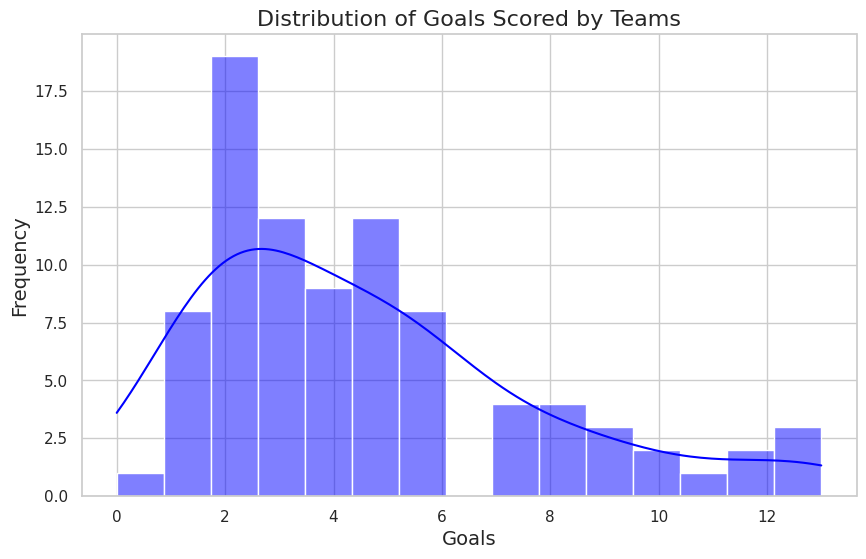

In [ ]:
# Distribution of goals scored by teams
plt.figure(figsize=(10, 6))
sns.histplot(data=all_data, x='Goals', kde=True, bins=15, color='blue')
plt.title('Distribution of Goals Scored by Teams', fontsize=16)
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

### **Distribution of Goals Scored by Teams**

The majority of teams score between 2 and 6 goals, with a few outliers scoring up to 12 goals. This distribution helps us understand the general scoring ability of teams in the tournament. Knowing the distribution of goals can help set benchmarks for team performance and identify high-scoring teams that might have a competitive edge.

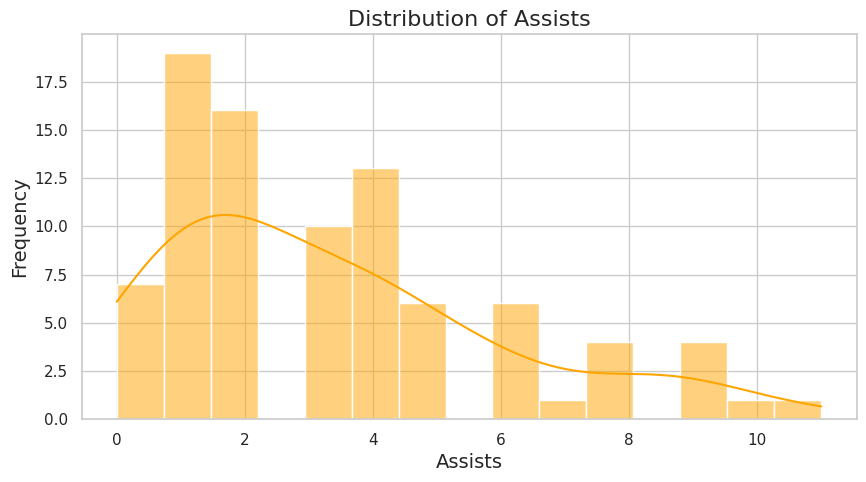

In [ ]:
# Set the style and color palette
sns.set(style= 'whitegrid')
palette = sns.color_palette('viridis', as_cmap= True)

# Distribution of assists
plt.figure(figsize=(10, 5))
sns.histplot(all_data['Ast'], kde= True, bins= 15, color= 'orange')
plt.title('Distribution of Assists', fontsize= 16)
plt.xlabel('Assists', fontsize= 14)
plt.ylabel('Frequency', fontsize= 14)
plt.show()

### **Distribution of Assists**

The majority of teams have between 1 and 4 assists, with a sharp decline in teams having more than 6 assists. Assists are crucial for understanding team dynamics and playmaking ability. Teams with higher assists are likely to have better coordination and teamwork.


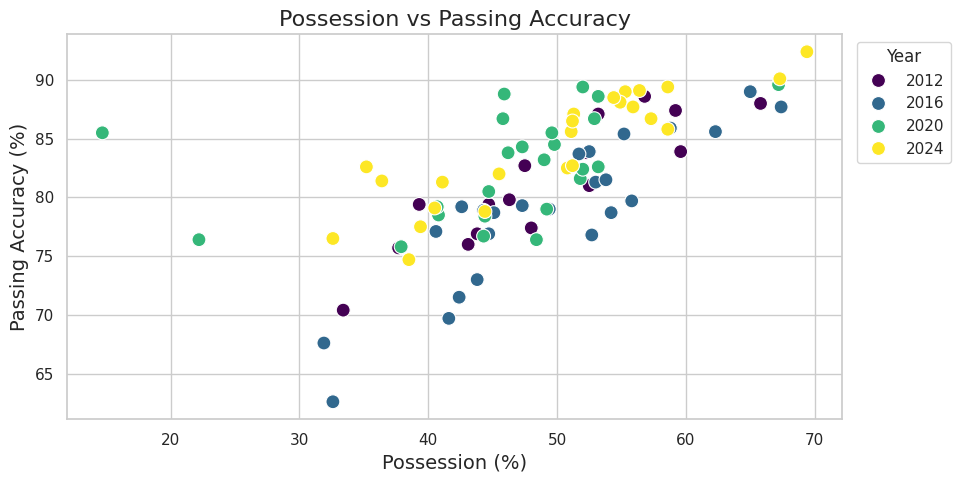

In [ ]:
# Relationship between possession and passing accuracy
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Possession%', y='Pass%', hue='Year', data=all_data, palette='viridis', s=100, legend='full')
plt.title('Possession vs Passing Accuracy', fontsize=16)
plt.xlabel('Possession (%)', fontsize=14)
plt.ylabel('Passing Accuracy (%)', fontsize=14)
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

### **Possession vs Passing Accuracy**

Teams with higher possession percentages generally have higher passing accuracy. Most teams cluster around 40-60% possession and 75-90% passing accuracy. This relationship underscores the importance of ball control and accurate passing in maintaining possession and potentially creating more scoring opportunities.

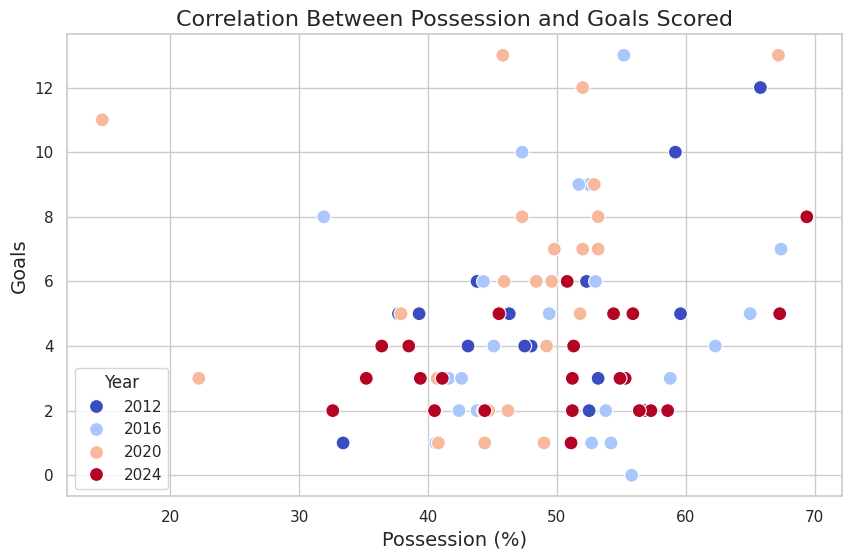

In [ ]:
# Correlation between possession and goals scored
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='Possession%', y='Goals', hue='Year', palette='coolwarm', s=100)
plt.title('Correlation Between Possession and Goals Scored', fontsize=16)
plt.xlabel('Possession (%)', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.legend(title='Year')
plt.show()

### **Correlation Between Possession and Goals Scored**

Higher possession does not always correlate with higher goals scored, indicating that possession alone does not guarantee success. This visualization suggests that while possession is important, other factors like shot efficiency and defensive strength also play crucial roles in a team's success.

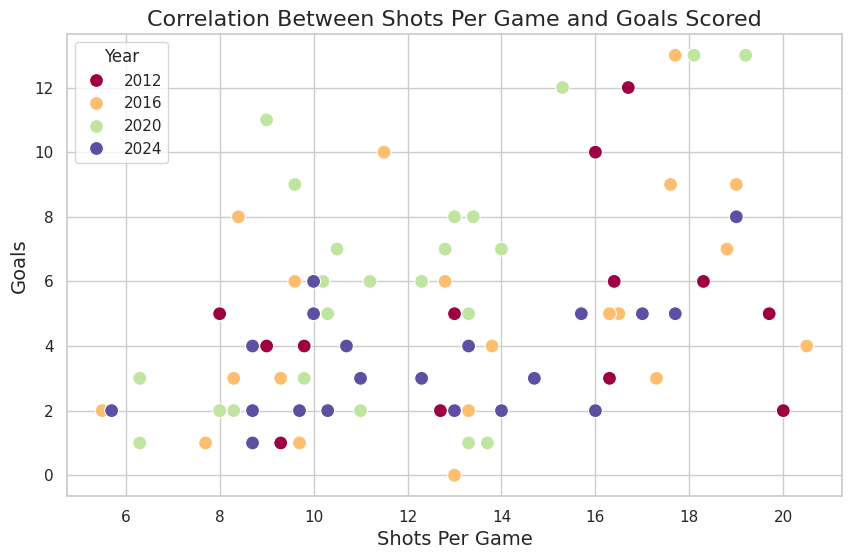

In [ ]:
# Correlation between shots per game and goals scored
plt.figure(figsize=(10, 6))
sns.scatterplot(data= all_data, x= 'Shots pg', y='Goals', hue= 'Year', palette= 'Spectral', s= 100)
plt.title('Correlation Between Shots Per Game and Goals Scored', fontsize= 16)
plt.xlabel('Shots Per Game', fontsize= 14)
plt.ylabel('Goals', fontsize= 14)
plt.legend(title= 'Year')
plt.show()

### **Correlation Between Shots Per Game and Goals Scored**

There is a positive correlation between shots per game and goals scored, but it is not perfectly linear. Some teams are more efficient in converting shots into goals. This highlights the importance of shot quality over quantity. Teams should focus not just on taking more shots but on creating high-quality scoring opportunities.

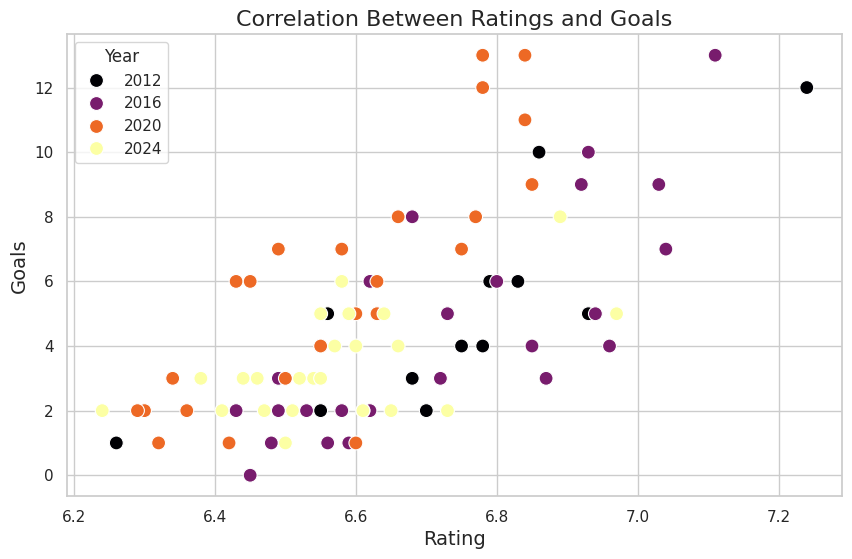

In [ ]:
# Correlation between team ratings and goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x='Rating', y='Goals', hue='Year', palette='inferno', s=100)
plt.title('Correlation Between Ratings and Goals', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.legend(title='Year')
plt.show()

### **Correlation Between Ratings and Goals**

Teams with higher overall ratings tend to score more goals, though there are exceptions. This suggests that team ratings, which are composite metrics, generally reflect offensive capabilities. However, individual outliers indicate that specific strengths or weaknesses in other areas (e.g., defense, midfield control) also impact overall success.

In [ ]:
# Select relevant features for clustering
features= ['# Pl', 'Age', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Ast', 'G+A', 'G-PK', 'Possession%', 'Pass%', 'Shots pg', 'AerialsWon', 'Rating']
data_for_clustering= all_data[features]

# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Display the first few rows to verify the selected and standardized data
data_for_clustering_scaled_df= pd.DataFrame(data_for_clustering_scaled, columns= features)
data_for_clustering_scaled_df.head()

,# Pl,Age,MP,Starts,Min,90s,Goals,Ast,G+A,G-PK,Possession%,Pass%,Shots pg,AerialsWon,Rating
0,-1.566365,-0.804897,-0.733141,-0.733141,-0.717346,-0.715812,-0.200790,-0.134011,-0.131751,-0.023455,-0.574338,-1.043410,-0.526474,-1.019798,0.678737
1,-0.094762,0.034996,0.138702,0.138702,0.034159,0.037674,-0.200790,0.246407,0.049407,-0.023455,-0.057961,-0.792045,-0.769746,-1.204537,-0.459427
2,-2.056900,-0.618254,-0.733141,-0.733141,-0.717346,-0.715812,-0.200790,-0.134011,-0.131751,-0.023455,-0.110652,0.159552,-0.985987,-1.779282,0.530281
3,-1.566365,-0.151647,0.138702,0.138702,0.284661,0.263720,0.120474,0.246407,0.230564,0.320557,-0.974793,-0.432952,-0.715685,-1.266117,1.421018
4,-0.094762,-0.898218,0.138702,0.138702,0.034159,0.037674,-0.522054,-0.134011,-0.312908,-0.367468,0.490031,0.949556,0.987216,-1.574016,0.183883


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

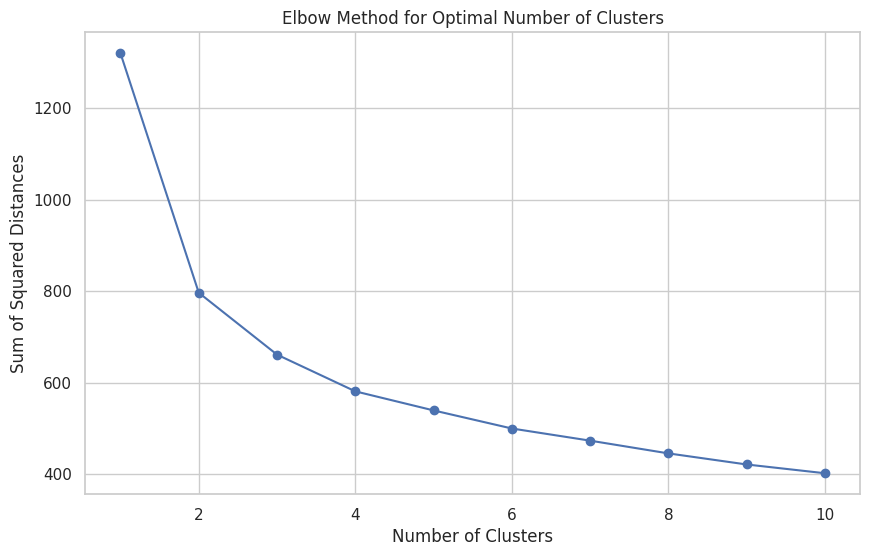

In [ ]:
# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


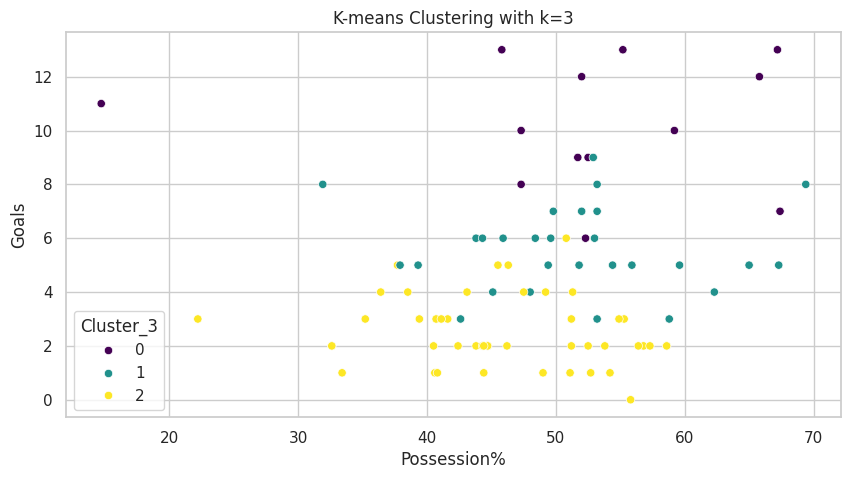

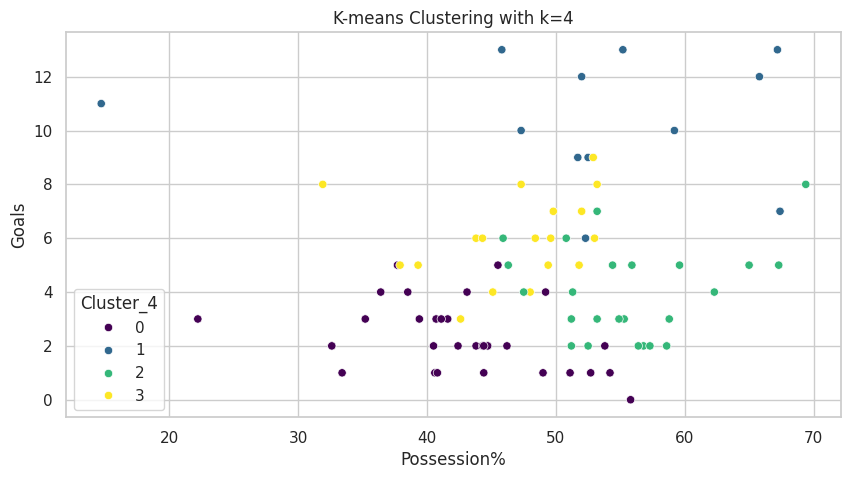

In [ ]:
# Apply K-means clustering with k=3
kmeans_3= KMeans(n_clusters= 3, random_state= 42)
all_data['Cluster_3']= kmeans_3.fit_predict(data_for_clustering_scaled)

# Apply K-means clustering with k=4
kmeans_4= KMeans(n_clusters= 4, random_state= 42)
all_data['Cluster_4']= kmeans_4.fit_predict(data_for_clustering_scaled)

# Visualize the clusters for k=3
plt.figure(figsize=(10, 5))
sns.scatterplot(data=all_data, x='Possession%', y='Goals', hue='Cluster_3', palette='viridis')
plt.title('K-means Clustering with k=3')
plt.show()

# Visualize the clusters for k=4
plt.figure(figsize=(10, 5))
sns.scatterplot(data= all_data, x= 'Possession%', y= 'Goals', hue= 'Cluster_4', palette= 'viridis')
plt.title('K-means Clustering with k=4')
plt.show()

In [ ]:
# Define key metrics to analyze
key_metrics= ['Possession%', 'Pass%', 'Shots pg', 'Goals', 'Ast', 'AerialsWon', 'Rating']

# Calculate mean values for each cluster with k=3
cluster_3_means= all_data.groupby('Cluster_3')[key_metrics].mean()
print("Cluster characteristics for k=3:")
print(cluster_3_means)

# Calculate mean values for each cluster with k=4
cluster_4_means = all_data.groupby('Cluster_4')[key_metrics].mean()
print("\nCluster characteristics for k=4:")
print(cluster_4_means)

Cluster characteristics for k=3:
           Possession%      Pass%   Shots pg      Goals       Ast  AerialsWon  \
Cluster_3                                                                       
0            52.184615  85.207692  16.200000  10.230769  8.153846   14.253846   
1            51.357143  83.160714  13.653571   5.571429  4.071429   13.846429   
2            45.872340  80.068085  11.065957   2.510638  1.595745   13.400000   

             Rating  
Cluster_3            
0          6.912308  
1          6.725714  
2          6.518936  

Cluster characteristics for k=4:
           Possession%      Pass%   Shots pg      Goals       Ast  AerialsWon  \
Cluster_4                                                                       
0            42.581250  77.650000   9.981250   2.312500  1.406250   14.818750   
1            52.591667  85.283333  16.433333  10.416667  8.166667   14.275000   
2            55.323077  86.384615  14.819231   3.846154  2.615385   11.357692   
3           

## **Cluster Characteristics Analysis**

The following numbers represent the average values of the metrics for the teams in each cluster across all UEFA Euro tournaments from 2012 to 2024. These averages give us a sense of the typical performance and style of the teams within each cluster over this period.

### **Clusters with k=3:**

**Cluster 0:**

* Possession: 52.18%
* Passing Accuracy: 85.21%
* Shots per Game: 16.20
* Goals: 10.23
* Assists: 8.15
* Aerials Won: 14.25
* Rating: 6.91

This cluster represents high-performing teams with high possession and passing accuracy. They take many shots per game and score the most goals, indicating a strong attacking style.

**Cluster 1:**

* Possession: 51.36%
* Passing Accuracy: 83.16%
* Shots per Game: 13.65
* Goals: 5.57
* Assists: 4.07
* Aerials Won: 13.85
* Rating: 6.73

These teams have slightly lower performance metrics than Cluster 0. They maintain good possession and passing accuracy but score fewer goals. This could indicate a balanced style but less effective finishing.

**Cluster 2:**

* Possession: 45.87%
* Passing Accuracy: 80.07%
* Shots per Game: 11.07
* Goals: 2.51
* Assists: 1.60
* Aerials Won: 13.40
* Rating: 6.52

This cluster represents lower-performing teams with less possession and passing accuracy. They take fewer shots and score the least goals, indicating a more defensive or less effective play style.

### **Clusters with k=4:**

**Cluster 0:**

* Possession: 42.58%
* Passing Accuracy: 77.65%
* Shots per Game: 9.98
* Goals: 2.31
* Assists: 1.41
* Aerials Won: 14.82
* Rating: 6.48

These are the lowest-performing teams, characterized by low possession, passing accuracy, and scoring metrics. They rely more on physical play (aerial duels).

**Cluster 1:**

* Possession: 52.59%
* Passing Accuracy: 85.28%
* Shots per Game: 16.43
* Goals: 10.42
* Assists: 8.17
* Aerials Won: 14.28
* Rating: 6.93

These are high-performing teams with excellent possession and passing accuracy, taking many shots and scoring high goals, similar to Cluster 0 in the k=3 model.

**Cluster 2:**

* Possession: 55.32%
* Passing Accuracy: 86.38%
* Shots per Game: 14.82
* Goals: 3.85
* Assists: 2.62
* Aerials Won: 11.36
* Rating: 6.66

These teams have high possession and passing accuracy but score fewer goals compared to Cluster 1. This indicates a possession-based style with less effective finishing.

**Cluster 3:**

* Possession: 46.68%
* Passing Accuracy: 80.29%
* Shots per Game: 11.73
* Goals: 6.00
* Assists: 4.67
* Aerials Won: 14.56
* Rating: 6.71

These teams have moderate possession and passing accuracy with decent scoring metrics. They seem to balance between possession and physical play, with a moderate goal-scoring ability.

### **Conclusion**

The clusters identified in the k-means analysis provide a detailed understanding of different playing styles and performance levels among the teams participating in the UEFA Euro tournaments from 2012 to 2024. High-performing clusters exhibit strong possession, passing accuracy, and goal-scoring metrics. These teams often dominate the field with strategic ball control and efficient playmaking, leading to higher goal counts. On the other hand, lower-performing clusters tend to have less possession, lower passing accuracy, and fewer goals, indicating a reliance on more defensive or less coordinated playing styles.

For players, coaches, and team staff, these insights are invaluable. High possession and passing accuracy are consistently linked with better performance, suggesting that teams aiming for success should focus on improving their ball control and passing efficiency. The trend over the tournaments shows that teams with higher possession rates tend to create more scoring opportunities, leading to better outcomes.

Moreover, the clustering analysis reveals that different strategies can be successful, but the most effective ones typically involve high possession and coordinated teamwork. Teams in the highest-performing cluster not only scored more goals but also had higher assist rates, highlighting the importance of playmaking and teamwork in achieving success.

Looking ahead to future tournaments, teams should aim to refine their strategies to align with the characteristics of the high-performing clusters. Emphasizing training on possession and passing accuracy, developing playmaking skills, and fostering teamwork can significantly enhance performance. Additionally, understanding the playstyles of other teams within the same cluster can provide strategic advantages, allowing teams to anticipate opponents' moves and adjust their tactics accordingly.

In summary, the analysis of the UEFA Euro tournaments from 2012 to 2024 highlights the critical factors that contribute to team success. High possession, accurate passing, and effective teamwork are the hallmarks of top-performing teams. By focusing on these areas, teams can develop strategies that not only improve their performance but also increase their chances of achieving success in future tournaments. This comprehensive understanding of team dynamics and strategies offers a roadmap for coaches, players, and teams aiming to excel in the competitive environment of the UEFA Euro tournaments.

In [ ]:
# Install the DagsHub python client
!pip install -q dagshub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.4 MB/s

In [ ]:
from dagshub.notebook import save_notebook

save_notebook(repo="carlosrod723/TunisiaLocalChapter_UEFAEURO2024", path=".")